In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('./inputs/')

['feature_explain.xlsx', 'sample_submit.txt', 'test_a.xlsx', 'train.xlsx']

In [3]:
train = pd.read_excel('inputs/train.xlsx')
test =  pd.read_excel('inputs/test_a.xlsx')
submission = pd.read_fwf('inputs/sample_submit.txt')
print(train.shape, test.shape, submission.shape)

(40000, 51) (12000, 50) (5, 2)


In [4]:
# 字典编码
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort
    return se.map(pd.Series(range(len(value)), index=value)).values

In [5]:
df = pd.read_excel('inputs/feature_explain.xlsx', sheet_name='train', skiprows=2)
index_num = 0
index_category = 0
for va in df.values:
    print('Column:', va[0], ' Description:', va[1])

Column: AGN_CNT_RCT_12_MON  Description: Numerical
Column: ICO_CUR_MON_ACM_TRX_TM  Description: Numerical
Column: NB_RCT_3_MON_LGN_TMS_AGV  Description: Numerical
Column: AGN_CUR_YEAR_AMT  Description: Numerical
Column: AGN_CUR_YEAR_WAG_AMT  Description: Numerical
Column: AGN_AGR_LATEST_AGN_AMT  Description: Numerical
Column: ICO_CUR_MON_ACM_TRX_AMT  Description: Numerical
Column: COUNTER_CUR_YEAR_CNT_AMT  Description: Numerical
Column: PUB_TO_PRV_TRX_AMT_CUR_YEAR  Description: Numerical
Column: MON_12_EXT_SAM_TRSF_IN_AMT  Description: Numerical
Column: MON_12_EXT_SAM_TRSF_OUT_AMT  Description: Numerical
Column: MON_12_EXT_SAM_NM_TRSF_OUT_CNT  Description: Numerical
Column: MON_12_EXT_SAM_AMT  Description: Numerical
Column: CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT  Description: Numerical
Column: CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT  Description: Numerical
Column: MON_12_CUST_CNT_PTY_ID  Description: Categorical
Column: MON_12_TRX_AMT_MAX_AMT_PCTT  Description: Numerical
Column: CUR_YEAR_MON_AGV_T

In [6]:
index_num = 0
index_category = 0
for va in df.values:
    if va[1]=='Categorical':
        train=train.rename(columns={va[0]:va[1]+"_"+str(index_category)})
        test=test.rename(columns={va[0]:va[1]+"_"+str(index_category)})
        index_category+=1
    else:
        train=train.rename(columns={va[0]:va[1]+"_"+str(index_num)})
        test=test.rename(columns={va[0]:va[1]+"_"+str(index_num)})
        index_num+=1
        print(str(va[0])+"  "+str(index_num-1))
train.head()

AGN_CNT_RCT_12_MON  0
ICO_CUR_MON_ACM_TRX_TM  1
NB_RCT_3_MON_LGN_TMS_AGV  2
AGN_CUR_YEAR_AMT  3
AGN_CUR_YEAR_WAG_AMT  4
AGN_AGR_LATEST_AGN_AMT  5
ICO_CUR_MON_ACM_TRX_AMT  6
COUNTER_CUR_YEAR_CNT_AMT  7
PUB_TO_PRV_TRX_AMT_CUR_YEAR  8
MON_12_EXT_SAM_TRSF_IN_AMT  9
MON_12_EXT_SAM_TRSF_OUT_AMT  10
MON_12_EXT_SAM_NM_TRSF_OUT_CNT  11
MON_12_EXT_SAM_AMT  12
CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT  13
CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT  14
MON_12_TRX_AMT_MAX_AMT_PCTT  15
CUR_YEAR_MON_AGV_TRX_CNT  16
MON_12_AGV_TRX_CNT  17
MON_12_ACM_ENTR_ACT_CNT  18
MON_12_AGV_ENTR_ACT_CNT  19
MON_12_ACM_LVE_ACT_CNT  20
MON_12_AGV_LVE_ACT_CNT  21
CUR_YEAR_PUB_TO_PRV_TRX_PTY_CNT  22
MON_6_50_UP_ENTR_ACT_CNT  23
MON_6_50_UP_LVE_ACT_CNT  24
CUR_YEAR_COUNTER_ENCASH_CNT  25
MON_12_ACT_OUT_50_UP_CNT_PTY_QTY  26
MON_12_ACT_IN_50_UP_CNT_PTY_QTY  27
LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL  28
LAST_12_MON_COR_DPS_DAY_AVG_BAL  29
CUR_MON_COR_DPS_MON_DAY_AVG_BAL  30
CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL  31
CUR_YEAR_COR_DPS_YEAR_DAY_A

,CUST_UID,LABEL,Numerical_0,Numerical_1,Numerical_2,Numerical_3,Numerical_4,Numerical_5,Numerical_6,Numerical_7,...,Categorical_2,Numerical_37,Numerical_38,Categorical_3,Numerical_39,Numerical_40,Categorical_4,Numerical_41,Categorical_5,Numerical_42
0,2a171d461bf24a739b804c2843ad4f6e,0,NaN,72.0,425.3,NaN,NaN,NaN,25879985.3,2.0,...,B,2.0,1.200000e+09,32.0,12.0,1708.45,NaN,416.84,NaN,2.0
1,c58d5848d18548e297963c2d9e092699,0,2282.0,222.0,NaN,11776572.4,NaN,1964626.4,14755499.8,2.0,...,B,1002.0,5.000002e+06,32.0,22.0,199.42,F,195.87,D,2.0
2,74e6d8179e784a039bcb5a722014f4a4,0,NaN,2.0,NaN,NaN,NaN,4599822.3,2.0,2.0,...,B,2.0,NaN,2.0,12.0,1135.55,F,1122.00,NaN,2.0
3,1b6a8be2c2e34de09ca00d71470ec180,1,NaN,NaN,22.0,NaN,NaN,NaN,NaN,2.0,...,A,2.0,5.000020e+05,12.0,12.0,98.45,NaN,92.00,C,2.0
4,1974b5e0440a41128a416a8cdc8a7c16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,2.0,NaN,2.0,12.0,NaN,NaN,355.87,C,2.0


In [7]:
# 把category和numerical 分开放
train=train[['CUST_UID','LABEL','Categorical_0','Categorical_1','Categorical_2','Categorical_3','Categorical_4','Categorical_5','Numerical_0','Numerical_1','Numerical_2','Numerical_3','Numerical_4','Numerical_5','Numerical_6','Numerical_7','Numerical_8','Numerical_9','Numerical_10','Numerical_11','Numerical_12','Numerical_13','Numerical_14','Numerical_15','Numerical_16','Numerical_17','Numerical_18','Numerical_19','Numerical_20','Numerical_21','Numerical_22','Numerical_23','Numerical_24','Numerical_25','Numerical_26','Numerical_27','Numerical_28','Numerical_29','Numerical_30','Numerical_31','Numerical_32','Numerical_33','Numerical_34','Numerical_35','Numerical_36','Numerical_37','Numerical_38','Numerical_39','Numerical_40','Numerical_41','Numerical_42']]
test=test[['CUST_UID','Categorical_0','Categorical_1','Categorical_2','Categorical_3','Categorical_4','Categorical_5','Numerical_0','Numerical_1','Numerical_2','Numerical_3','Numerical_4','Numerical_5','Numerical_6','Numerical_7','Numerical_8','Numerical_9','Numerical_10','Numerical_11','Numerical_12','Numerical_13','Numerical_14','Numerical_15','Numerical_16','Numerical_17','Numerical_18','Numerical_19','Numerical_20','Numerical_21','Numerical_22','Numerical_23','Numerical_24','Numerical_25','Numerical_26','Numerical_27','Numerical_28','Numerical_29','Numerical_30','Numerical_31','Numerical_32','Numerical_33','Numerical_34','Numerical_35','Numerical_36','Numerical_37','Numerical_38','Numerical_39','Numerical_40','Numerical_41','Numerical_42']]

In [8]:
for c in range(6):
    f="Categorical_"+str(c)
    train[f].fillna("ety",inplace=True)
    test[f].fillna("ety",inplace=True)
    train[f] = change_object_cols(train[f])
    test[f] = change_object_cols(test[f])

In [9]:
for c in range(43):
    f="Numerical_"+str(c)
    train[f].fillna(train[f].median(),inplace=True)
    test[f].fillna(test[f].median(),inplace=True)

In [10]:
train.to_csv("preprocesses/train_dict_encode.csv", index=False)
test.to_csv("preprocesses/test_dict_encode.csv", index=False)

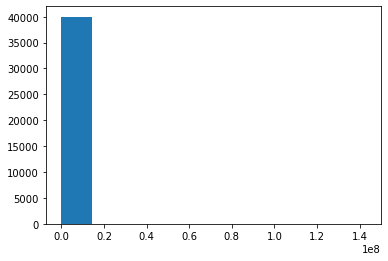

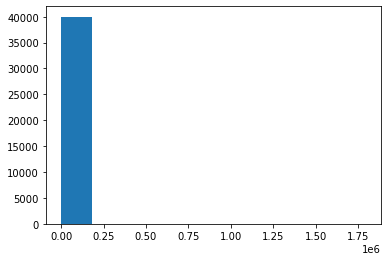

In [11]:
for c in range(2):
    f="Numerical_"+str(c)
    plt.hist(train[f],bins=10)
    plt.show()

In [12]:
for c in range(2):
    f="Numerical_"+str(c)
    print(train[f].describe())

count    4.000000e+04
mean     1.526474e+04
std      7.220833e+05
min      2.000000e+00
25%      2.472000e+03
50%      2.472000e+03
75%      2.472000e+03
max      1.428082e+08
Name: Numerical_0, dtype: float64
count    4.000000e+04
mean     5.328388e+02
std      1.141607e+04
min      2.000000e+00
25%      2.200000e+01
50%      9.200000e+01
75%      2.920000e+02
max      1.795242e+06
Name: Numerical_1, dtype: float64
